# Q1

In [36]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [39]:
df=pd.read_csv('SalaryData_Train(1).csv')

In [40]:
df2=pd.read_csv('SalaryData_Test(1).csv')

In [41]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [45]:
df.shape

(30161, 14)

In [46]:
df2.shape

(15060, 14)

In [47]:
data=df.copy()

In [48]:
data2=df2.copy()

In [49]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [51]:
le = preprocessing.LabelEncoder()
data['workclass']= le.fit_transform(data['workclass'])
data['maritalstatus']= le.fit_transform(data['maritalstatus'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['native']= le.fit_transform(data['native'])
data['Salary']= le.fit_transform(data['Salary'])

In [52]:
le = preprocessing.LabelEncoder()
data2['workclass']= le.fit_transform(data2['workclass'])
data2['maritalstatus']= le.fit_transform(data2['maritalstatus'])
data2['occupation']= le.fit_transform(data2['occupation'])
data2['relationship']= le.fit_transform(data2['relationship'])
data2['race']= le.fit_transform(data2['race'])
data2['sex']= le.fit_transform(data2['sex'])
data2['native']= le.fit_transform(data2['native'])
data2['Salary']= le.fit_transform(data2['Salary'])

In [53]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0


In [54]:
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0


In [55]:
data.drop(['education'],axis=1,inplace=True)

In [56]:
data2.drop(['education'],axis=1,inplace=True)

In [57]:
data.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [58]:
data2.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'educationno'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'native'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

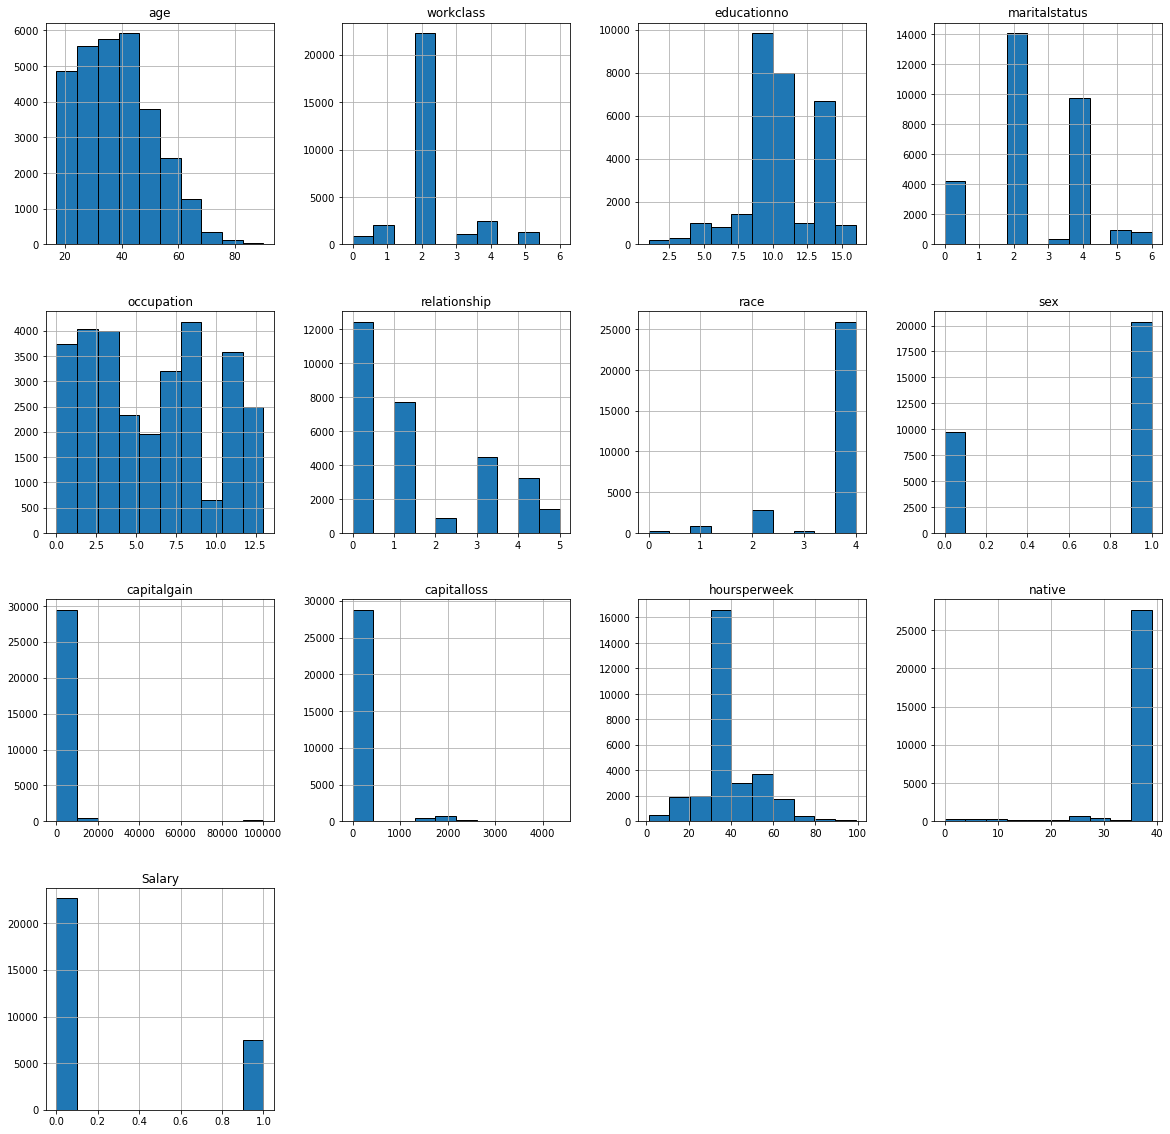

In [59]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1)

In [60]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [61]:
X2=data2.iloc[:,:-1]
Y2=data2.iloc[:,-1]

In [62]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [63]:
clf = SVC(C= 10,gamma = 50)
clf.fit(X , Y)
y_pred = clf.predict(X)
acc = accuracy_score(Y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y, y_pred)

Accuracy = 97.50339842843407


array([[22528,   125],
       [  628,  6880]], dtype=int64)

In [64]:
clf = SVC(C= 10,gamma = 50)
clf.fit(X2 , Y2)
y_pred2 = clf.predict(X2)
acc = accuracy_score(Y2, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(Y2, y_pred2)

Accuracy = 98.26029216467464


array([[11328,    32],
       [  230,  3470]], dtype=int64)

In [65]:
tpred=clf.predict(X2)

In [66]:
acc=accuracy_score(Y2,tpred)
acc

0.9826029216467463

In [67]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
a={'predicted_y':y_pred}
a

{'predicted_y': array([0, 0, 0, ..., 0, 0, 1])}

In [69]:
n=pd.DataFrame(a)
n.head()

,predicted_y
0,0
1,0
2,0
3,0
4,0


In [70]:
n.predicted_y.value_counts()

0    23156
1     7005
Name: predicted_y, dtype: int64

# Q2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [4]:
df=pd.read_csv('forestfires.csv')

In [5]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
data=df.copy()

In [8]:
data.drop(['month','day'],axis=1,inplace=True)

In [9]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


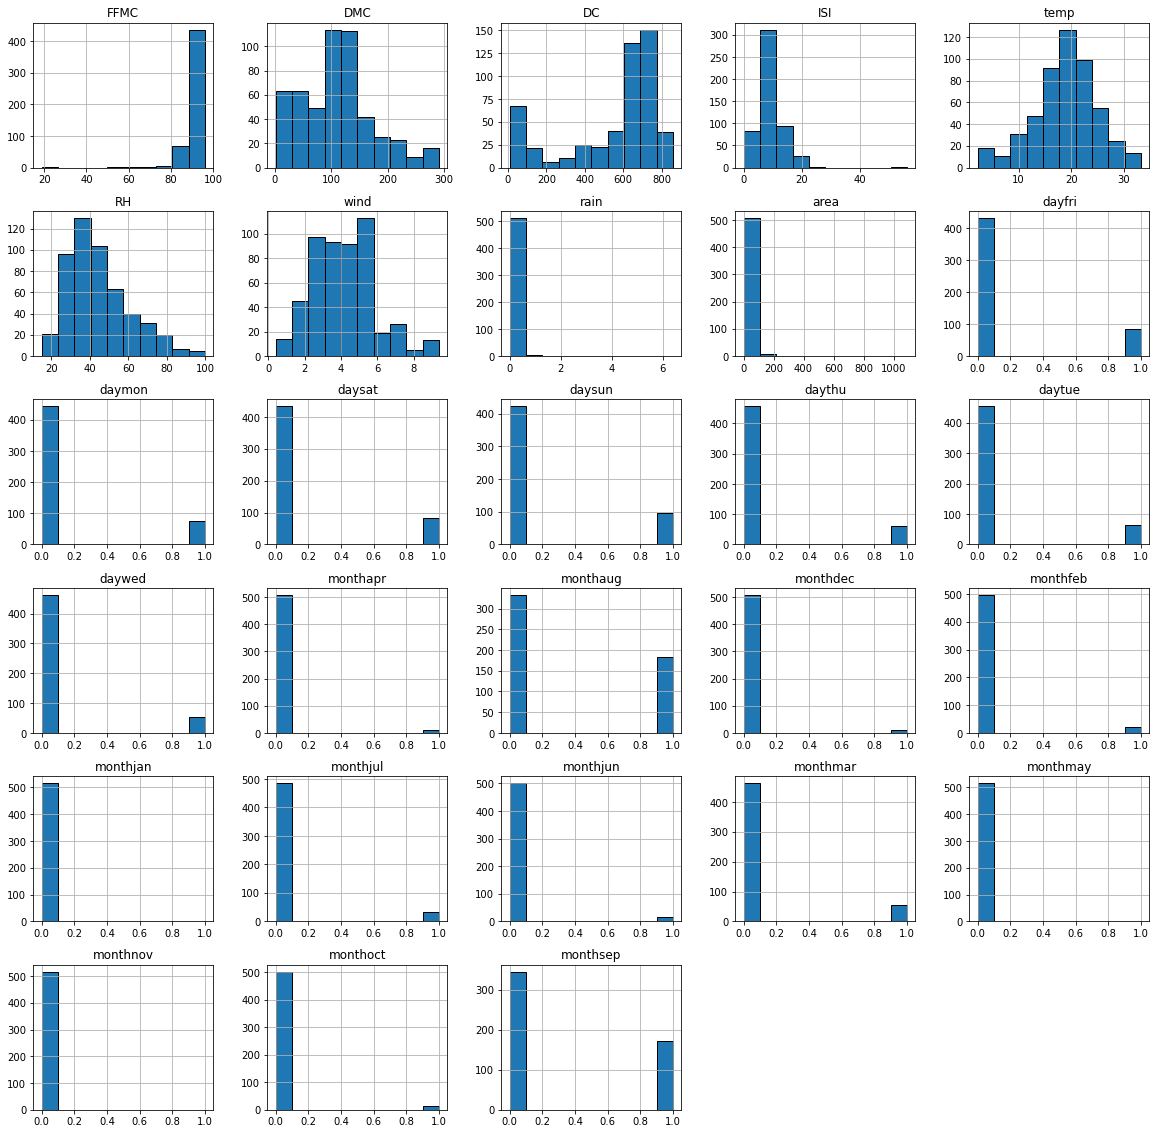

In [10]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

In [11]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

In [12]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [13]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [14]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [16]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [18]:
y.value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [19]:
!pip install imblearn

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Hemanth H L\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)
y_df

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
y_df.size_category.value_counts()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42)

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [21]:
gsv.best_params_ , gsv.best_score_

NameError: name 'gsv' is not defined

In [22]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

NameError: name 'x_train' is not defined

In [23]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

NameError: name 'x_train' is not defined

In [24]:
print(classification_report(y_test,y_pred))

NameError: name 'y_test' is not defined

In [25]:
pdata=data.copy()

In [26]:
pdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)
pca_values=pca.fit_transform(x_resample)

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

In [28]:
x=pd.DataFrame(pca_values[:,0:15])
x

NameError: name 'pca_values' is not defined

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y_resample,test_size=0.2, random_state=0)

NameError: name 'y_resample' is not defined

In [30]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,0.1,0.01],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [31]:
gsv.best_params_ , gsv.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [32]:
clf = SVC(C= 15,gamma = 0.1,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

NameError: name 'x_train' is not defined

In [33]:
clf = SVC(C= 15,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

NameError: name 'x_train' is not defined

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test,y_pred))

NameError: name 'y_test' is not defined